## Data Mining and Machine Learning 
### Logistic Regression
###  Libraries: scikit-learn and h2o
#### Edgar Acuna
#### Marzo 2019

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator
h2o.connect()
h2o.no_progress()


Connecting to H2O server at http://localhost:54321....... failed.


H2OConnectionError: Could not establish link to the H2O cloud http://localhost:54321 after 5 retries
[56:56.02] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE74160>: Failed to establish a new connection: [Errno 10061] No connection could be made because the target machine actively refused it',))
[56:58.23] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE74358>: Failed to establish a new connection: [Errno 10061] No connection could be made because the target machine actively refused it',))
[57:00.45] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE74240>: Failed to establish a new connection: [Errno 10061] No connection could be made because the target machine actively refused it',))
[57:02.67] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE74320>: Failed to establish a new connection: [Errno 10061] No connection could be made because the target machine actively refused it',))
[57:04.88] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE74198>: Failed to establish a new connection: [Errno 10061] No connection could be made because the target machine actively refused it',))

### Example 1: Predicting the final grade in a class

In [ ]:
df=pd.read_csv("c://PW-PR/eje1dis.csv")
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
databin=df[['E1','pass']]
print(databin.head())

In [ ]:
#Trazando la linea de regresion sobre el plot de puntos
x1=databin.iloc[:,0]
x2=databin.iloc[:,1]
plt.scatter(x1,x2)
plt.plot(x1, np.poly1d(np.polyfit(x1, x2, 1))(x1),color='red')

plt.show()

### Applying Logistic Regression to predict Final Grade. Use of sckikit-learn

In [17]:
#Applying Logistic Regression to predict Final Grade
X=df[['E1',"E2"]]
y3=df['pass']
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression(solver="newton-cg")
model = model.fit(X, y3)
print("Coeficientes del modelo", model.coef_)

Coeficientes del modelo [[0.84415919 0.5817652 ]]


In [18]:
#Accuracy
model.score(X,y3)

1.0

In [19]:
# Tasa de precision
pred = model.predict(X)
print(pred)
pred1=model.predict_proba(X)
print(pred1[0:5,:])
print(classification_report(y3, pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


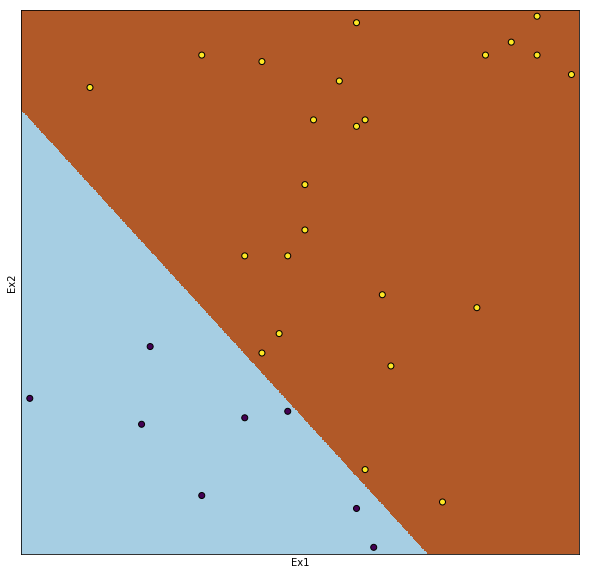

In [20]:
from matplotlib.colors import ListedColormap
logis = LogisticRegression(solver="newton-cg")
X1=df.iloc[:,0:2].as_matrix()
y1=df['pass'].as_matrix()
logis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=logis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression using library H2o

In [21]:
df1=h2o.H2OFrame(df)
myx=['E1','E2']
myy='Nota'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= df1)
y_pred=glm_model.predict(df1)
print (y_pred['predict']==df1['Nota']).sum()/float(len(df1))

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\h2o\utils\shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


H2OConnectionError: Not connected to a cluster. Did you run `h2o.connect()`?

### Example 2. Logistic Regression for Diabetes using sckit-learn

In [ ]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#The response  variable must be binary (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
#Haciendo la regresion logistica y calculando su precision
model = LogisticRegression()
model = model.fit(X, y)
print model.coef_

In [ ]:
# Accuracy rate
model.score(X, y)

In [ ]:
predictions = model.predict(X)
print(classification_report(y, predictions))

### Logistic regression for Diabetes  using the H2o library

In [ ]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy='C9'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= diabetes)
y_pred=glm_model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))